In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO

from IPython.display import Image

import pydotplus

In [2]:
feats = pd.read_csv("../System/feats_train.csv")

labels = feats["class"]
feats.drop('class', axis=1, inplace=True)

feats.head()

superlatives  degree_adverbs  comparative_adverbs  proper_nouns     dates  \
0      0.002488        0.200000             0.133333      0.224000  0.000000   
1      0.000000        0.047619             0.047619      0.170940  0.000000   
2      0.004255        0.111111             0.000000      0.163934  0.017021   
3      0.000000        0.083333             0.000000      0.266667  0.000000   
4      0.002066        0.000000             0.000000      0.152866  0.004132   

    numbers  fp_pronouns  negations  pos_emotion  neg_emotion  \
0  0.012438     0.230769   0.000000     0.009950     0.014925   
1  0.000000     0.545455   0.010471     0.002618     0.005236   
2  0.008511     0.125000   0.017021     0.017021     0.004255   
3  0.037037     0.000000   0.005291     0.015873     0.000000   
4  0.035124     0.555556   0.002066     0.004132     0.006198   

        ...         readability  ap_num  ap_date  ap_title  alliteration  \
0       ...              0.4097     0.0      1.0       1.0      0.000000   
1       ...              0.3935     0.0      1.0       1.0      0.166667   
2       ...              0.3905     0.0      1.0       1.0      0.000000   
3       ...              0.2764     1.0      1.0       0.0      0.666667   
4       ...              0.5461     1.0      1.0       1.0      0.000000   

   profanity  lexical_diversity  lexical_density  function_words  \
0   0.000000           0.613692         0.589242        0.410758   
1   0.002577           0.590206         0.597938        0.402062   
2   0.000000           0.566667         0.575000        0.425000   
3   0.000000           0.708333         0.604167        0.395833   
4   0.000000           0.529532         0.610998        0.389002   

   spelling_errors  
0         0.029340  
1         0.064433  
2         0.016667  
3         0.156250  
4         0.042770  

[5 rows x 43 columns]

In [3]:
groups = ["complexity", "deception", "details", "formality"
                  ,"humour", "imagination", "vagueness"]

colour_map = {"complexity":"b", "deception":"g", "details":"r", "formality":"c"
                  ,"humour":"m", "imagination":"y", "vagueness":"k"}

feat_group_map = dict()

for g in groups:
    with open("../System/feature_sets/{}.txt".format(g)) as file:
        for line in file:
            if line.strip() in feats.columns:
                feat_group_map[line.strip()] = g

In [4]:
inf_gain = dict(zip(feats.columns, mutual_info_classif(feats, labels, discrete_features=True)))
inf_gain_pd = pd.DataFrame.from_dict(inf_gain, orient='index')

inf_gain_pd.columns = ['Information Gain']
sorted_ranks = inf_gain_pd.sort_values(by='Information Gain', ascending=False)

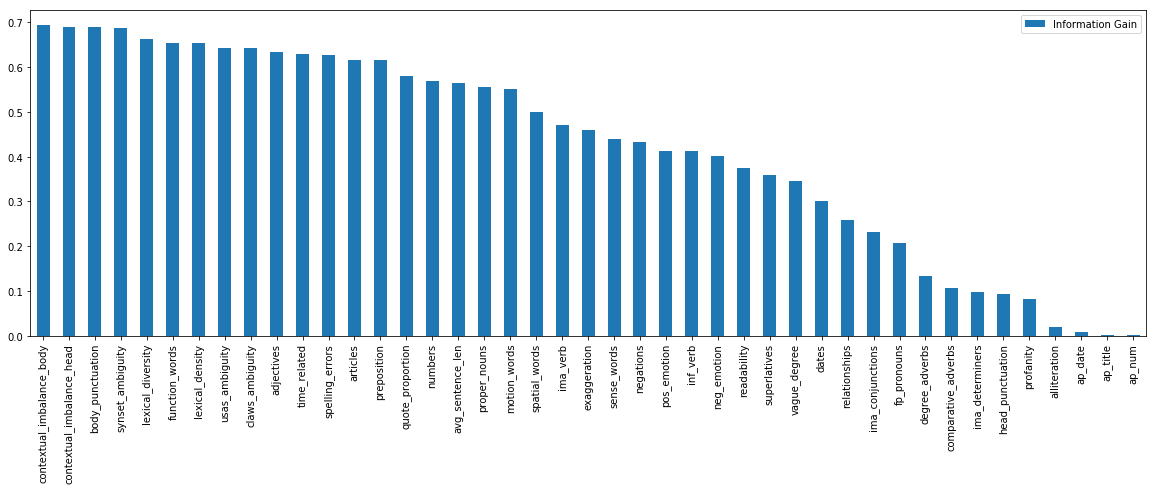

In [5]:
sorted_ranks.plot.bar(figsize=(20,6))
plt.show()

In [42]:
sorted_ranks['group'] = [feat_group_map[feat] for feat in sorted_ranks.index.values]
sorted_ranks.loc[sorted_ranks['group']=='vagueness']

Information Gain      group
synset_ambiguity             0.687301  vagueness
usas_ambiguity               0.642791  vagueness
claws_ambiguity              0.641746  vagueness
exaggeration                 0.459432  vagueness
superlatives                 0.358383  vagueness
vague_degree                 0.345578  vagueness
degree_adverbs               0.133122  vagueness
comparative_adverbs          0.107115  vagueness

In [39]:
ig_groups = sorted_ranks.groupby('group').sum()
ig_groups['mean'] = sorted_ranks.groupby('group').mean()
ig_groups['count'] = sorted_ranks.groupby('group').count()

ig_groups

Information Gain      mean  count
group                                         
complexity           4.272929  0.534116      8
deception            1.043266  0.347755      3
details              3.541682  0.505955      7
formality            0.640384  0.160096      4
humour               2.155730  0.359288      6
imagination          3.076629  0.439518      7
vagueness            3.375468  0.421933      8

In [40]:
dtree = DecisionTreeClassifier()
dtree.fit(feats, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

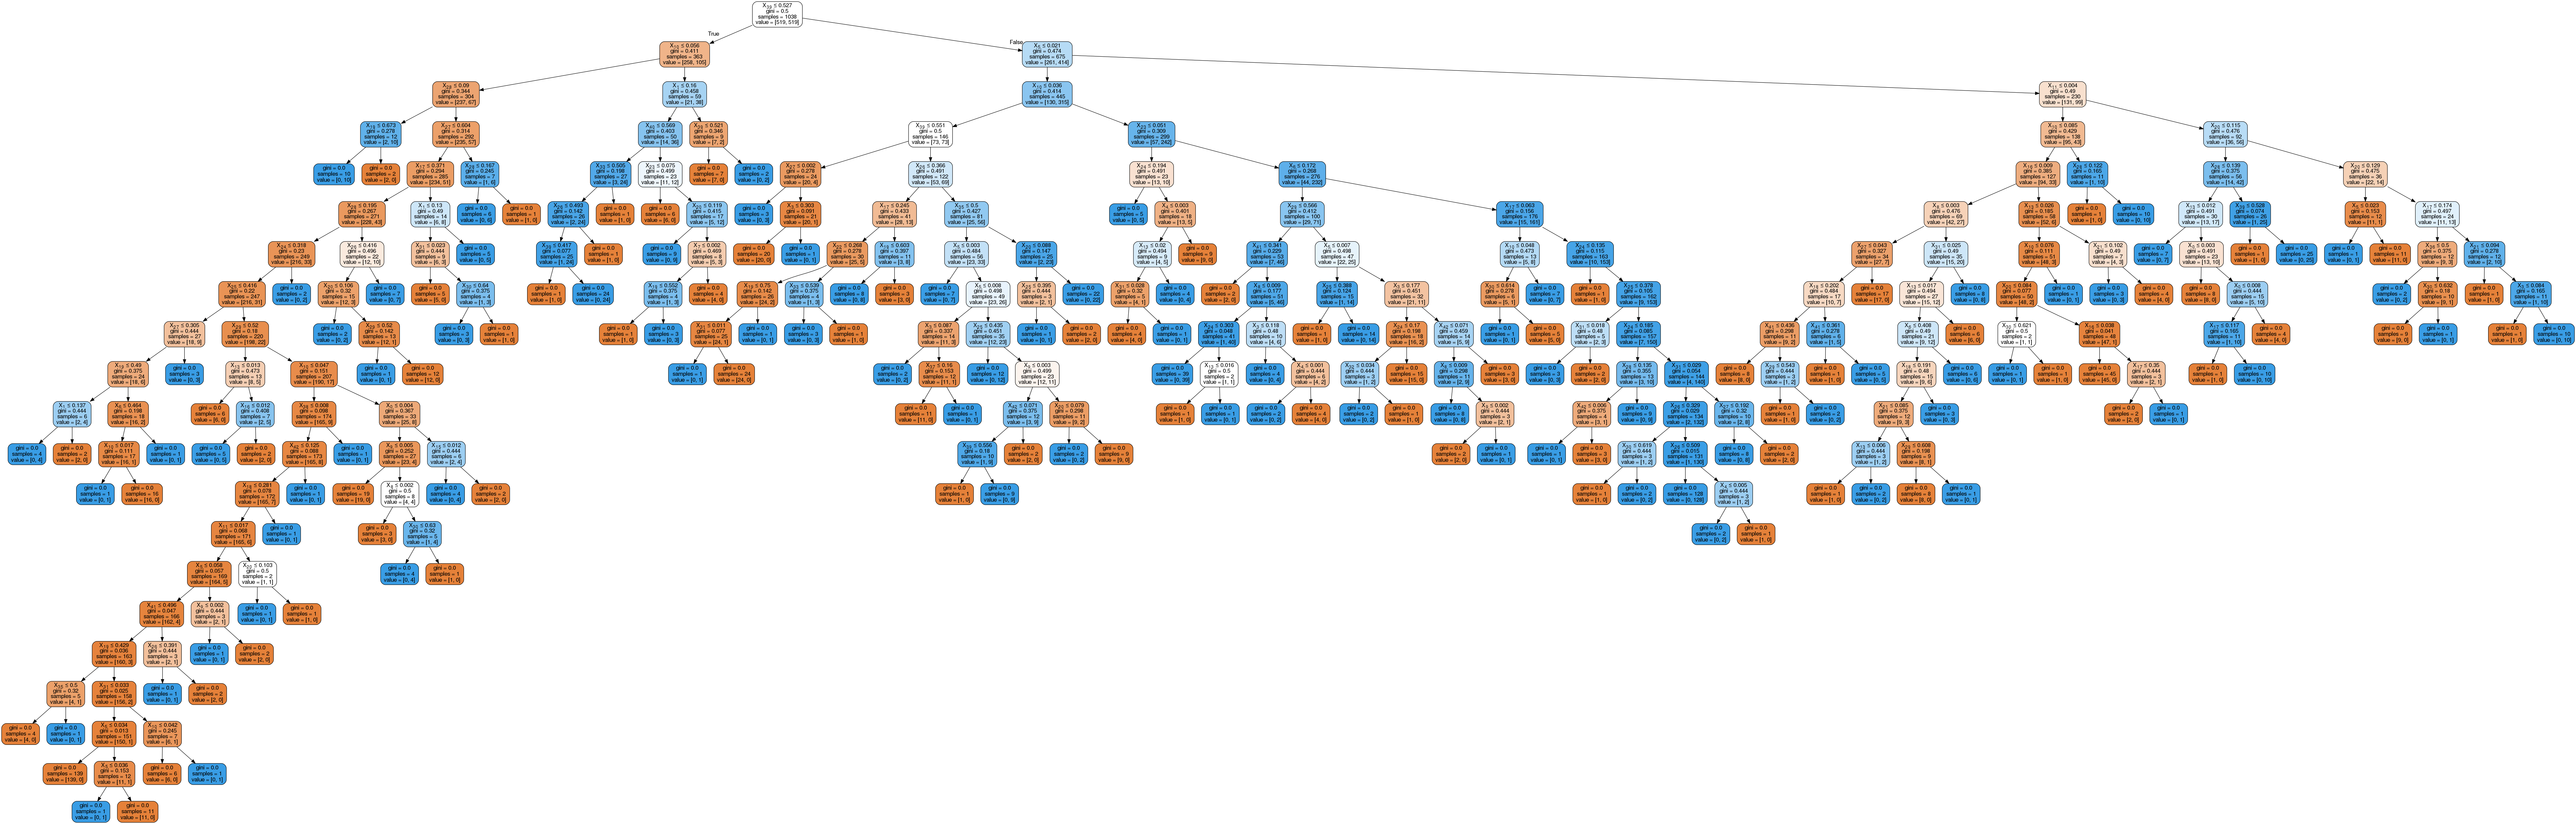

In [8]:
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [9]:
feats.columns[39]

'lexical_diversity'

In [10]:
feats.columns[10]

'time_related'

In [11]:
feats.columns[5]

'numbers'